In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop


In [4]:
import matplotlib.pyplot as plt

In [5]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"

In [6]:
import shutil # High Level File Operations

In [7]:
#if(os.path.isdir("Xray")):
    #shutil.rmtree("Xray", ignore_errors=False, onerror=None)

In [8]:
#os.listdir('Xray')

In [7]:
DIR = "Xray"
os.listdir(DIR)

['covid', 'normal']

In [8]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


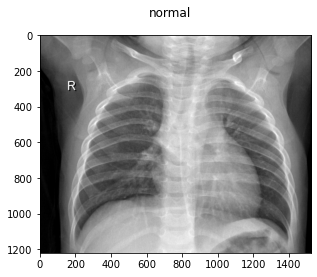

In [9]:

normal_images = []
for img_path in glob.glob(DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

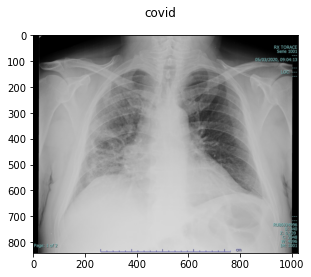

In [10]:
covid_images = []
for img_path in glob.glob(DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [11]:
print(len(normal_images))
print(len(covid_images))


28
70


In [12]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [15]:

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

In [16]:
train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')


Found 69 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 29 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)


C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
11/11 [==============================] - 6s 479ms/step - loss: 1.6607 - accuracy: 0.5822 - val_loss: 0.5444 - val_accuracy: 0.8750
Epoch 2/48
11/11 [==============================] - 4s 416ms/step - loss: 0.6010 - accuracy: 0.7758 - val_loss: 0.5901 - val_accuracy: 0.8750
Epoch 3/48
11/11 [==============================] - 5s 428ms/step - loss: 0.6637 - accuracy: 0.7025 - val_loss: 0.4903 - val_accuracy: 0.8750
Epoch 4/48
11/11 [==============================] - 5s 437ms/step - loss: 0.7317 - accuracy: 0.5990 - val_loss: 0.5973 - val_accuracy: 0.8750
Epoch 5/48
11/11 [==============================] - 5s 444ms/step - loss: 0.6795 - accuracy: 0.6818 - val_loss: 0.5804 - val_accuracy: 0.8750
Epoch 6/48
11/11 [==============================] - 5s 425ms/step - loss: 0.6280 - accuracy: 0.6953 - val_loss: 0.5599 - val_accuracy: 0.8750
Epoch 7/48
11/11 [==============================] - 4s 407ms/step - loss: 0.5387 - accuracy: 0.8342 - val_loss: 0.5510 - val_accuracy: 0.8750
Epoch 

In [19]:
model.save_weights('covid.h5')

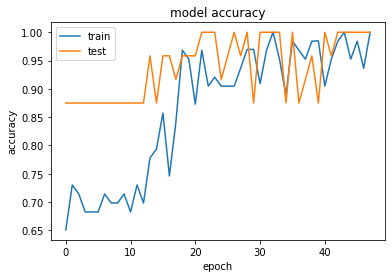

In [20]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


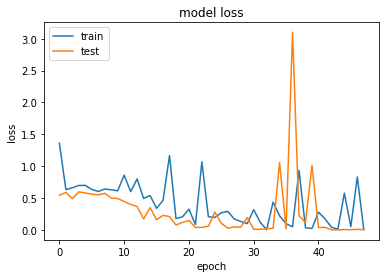

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:

print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 1.0
validation_accuracy 1.0


In [23]:
label = validation_generator.classes

In [24]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]


In [25]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[21,  8],
       [ 0,  0]], dtype=int64)

In [26]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,21,21
1,8,8
All,29,29


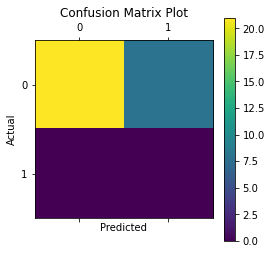

In [27]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();


In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Epoch 1/5
200/200 [==============================] - 0s 737us/step - loss: 0.5650 - accuracy: 0.6941
Epoch 2/5
200/200 [==============================] - 0s 785us/step - loss: 0.3164 - accuracy: 0.8624
Epoch 3/5
200/200 [==============================] - 0s 796us/step - loss: 0.2946 - accuracy: 0.8644
Epoch 4/5
200/200 [==============================] - 0s 820us/step - loss: 0.2780 - accuracy: 0.8743
Epoch 5/5
200/200 [==============================] - 0s 818us/step - loss: 0.2708 - accuracy: 0.8775


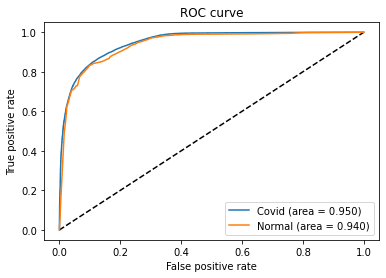

In [29]:
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Covid (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='Normal (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [25]:
model.load_weights('covid.h5')

In [26]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('IM-0214-0001.jpeg')

x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape ( 150, 150,3)
x = x.reshape((1,) + x.shape)

In [27]:
if (model.predict_classes(x)==0):
    print ("It is a covid")
else:
    print ("It is a normal")


It is a normal


In [23]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('covid (1).jpeg')

x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape ( 150, 150,3)
x = x.reshape((1,) + x.shape)

In [24]:
if (model.predict_classes(x)==0):
    print ("It is a covid")
else:
    print ("It is a normal")


It is a covid
